## <span style="color:blue">  Numerical exercises 7</span>

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 15})

### Exercise 07.2

Use the NSL simulator code to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

### EQUILIBRATION

- We want a 50% acceptance so i have to fix $\delta$ in order to obtain this ratio. Every particle move is in an interval $[-\delta,\delta]$ 
    - solid $\delta$ = 0.05 ---> acceptance $\approx54\%$
    - liquind $\delta$ = 0.1 ---> acceptance $\approx51\%$
    - gas $\delta$ = 4. Note that for the gas is not possible to have a lower ratio than $\approx61\%$. Due to this very high $\delta$, the system doesn't reach a state of stable equilibrium like for solid and liquid


- We will see how the quilibrium is reached quickly for the NVT simulation so it is not necessary to add an equilibration phase for solid and liquid, for gas it is different.

In [145]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 15})

def plot_equilibration(directory):
    fig = plt.figure(figsize = (18,8) )
    fig.suptitle(directory+" equilibration phase", fontsize = (22))

    N,epot_ist,epot_ave = np.loadtxt("../c++/es 7/OUTPUT/equilibration/"+directory+"/potential_energy.dat", usecols=(0,1,2), unpack = 'true')
    x = np.arange(N[-1])

    plt.plot(N,epot_ist, label = "instant pot energy", color = "blue", linewidth=0.8)
    plt.plot(N,epot_ave, label = "cumulative_average pot energy", color = "red", ls="-", linewidth=2.5)
    plt.xlabel("step")
    plt.ylabel("U*")
    #plt.hlines(0.8 ,0 ,N[-1], color = "red", label = "desired value", linewidth=2.5) 
    plt.grid()
    plt.legend()

    plt.show()

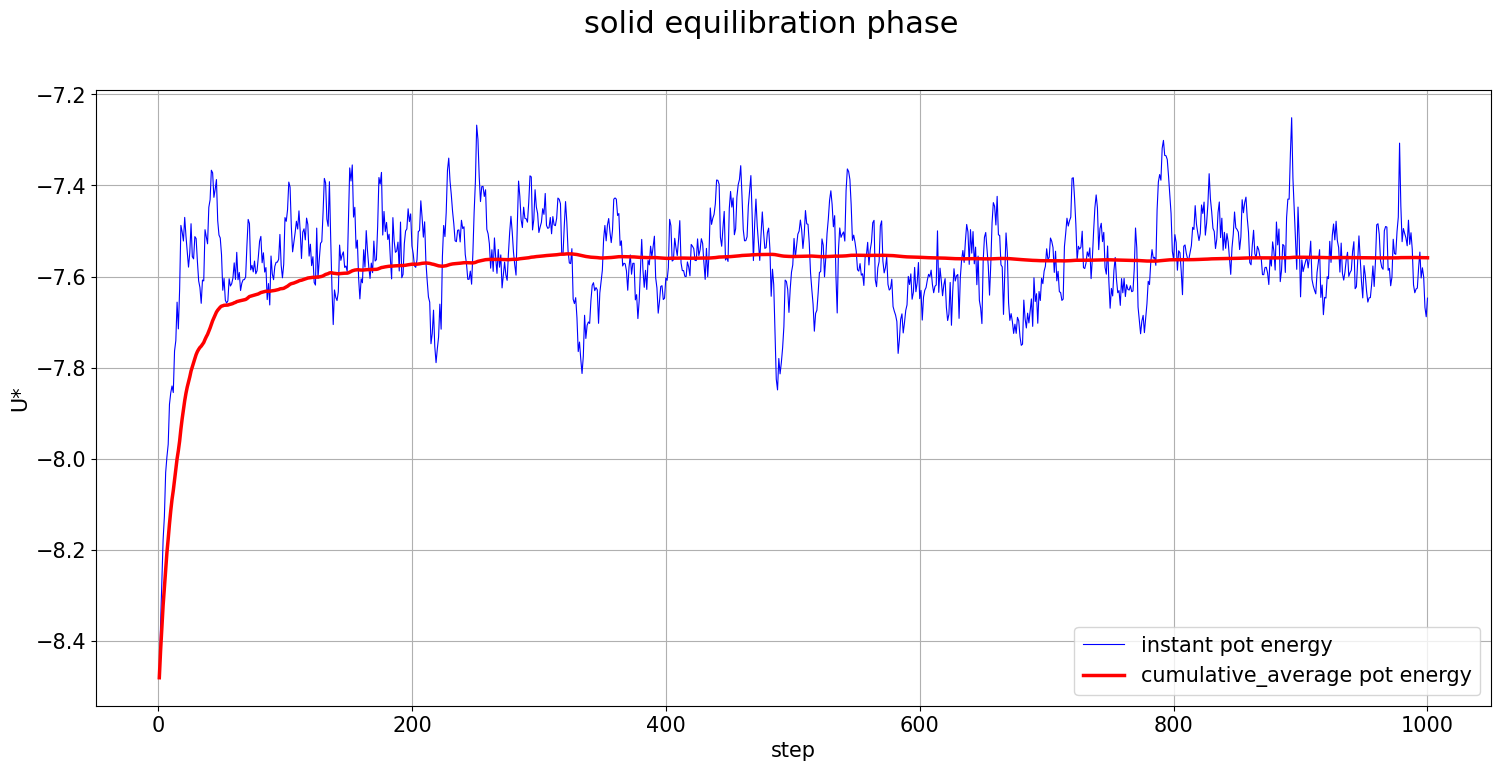

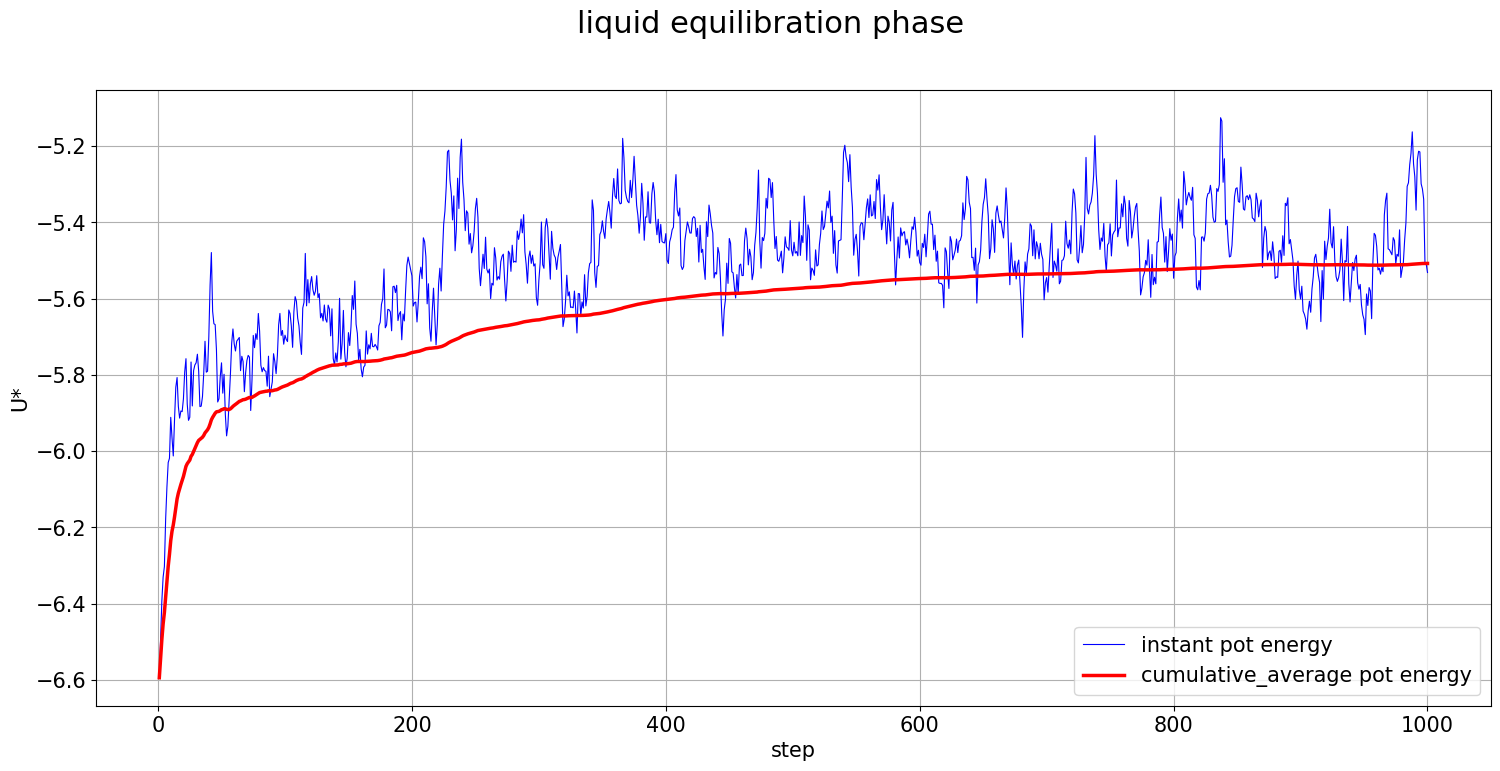

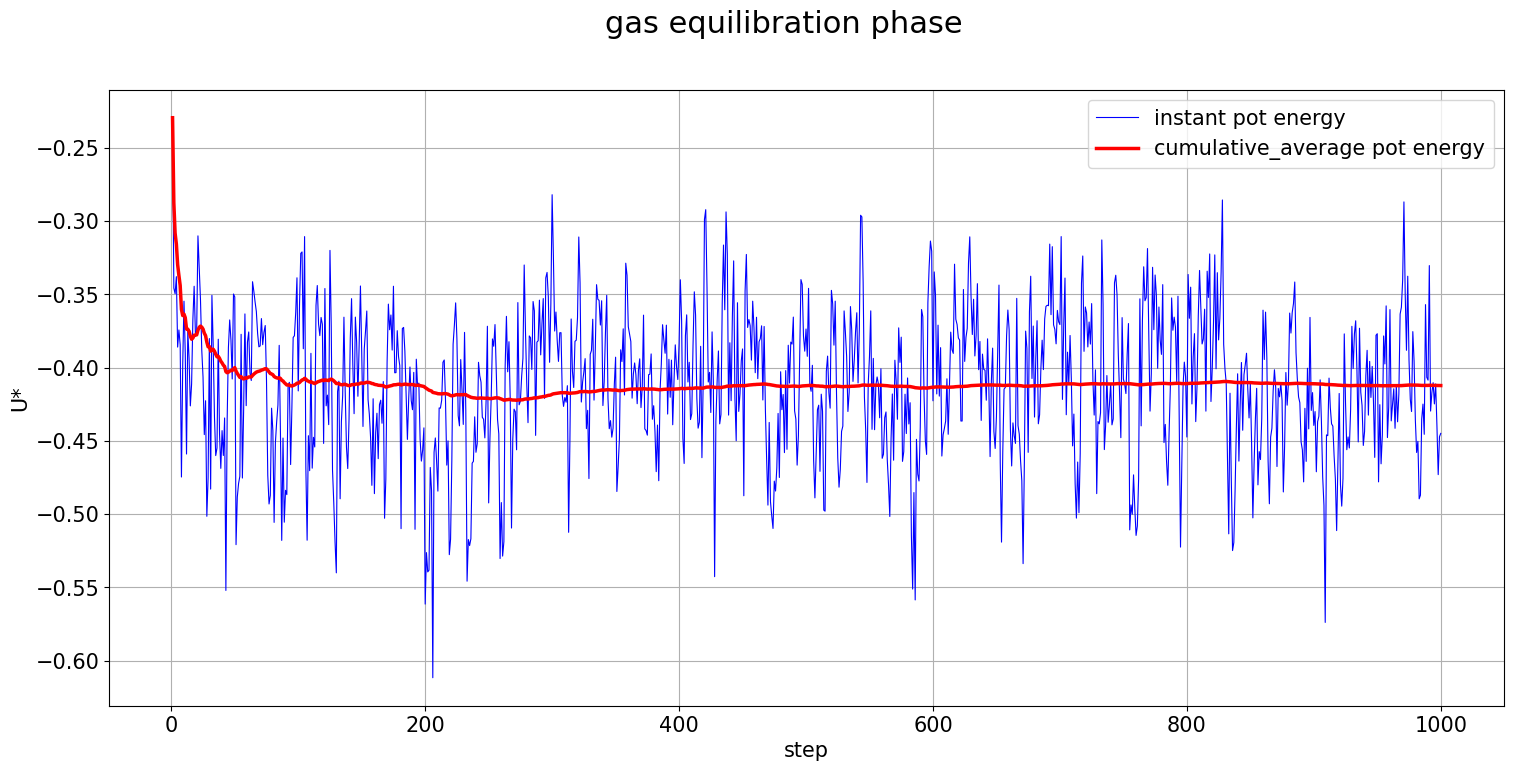

In [146]:
directories=["solid","liquid","gas"]
for direct in directories:
    plot_equilibration(direct)

### AUTOCORRELATION 

In [332]:
V_solid = np.loadtxt("../c++/es 7/OUTPUT/equilibration/solid/potential_energy.dat", usecols=(1), unpack = 'true')
V_liqid = np.loadtxt("../c++/es 7/OUTPUT/equilibration/liquid/potential_energy.dat", usecols=(1), unpack = 'true')
V_gas   = np.loadtxt("../c++/es 7/OUTPUT/equilibration/gas/potential_energy.dat", usecols=(1), unpack = 'true')

In [336]:
nsteps = 1000
t = np.arange(nsteps)
tmax = nsteps

def autocorrelation(V_state) :
    s = [np.zeros(nsteps) for j in range(3) ]
    s[0] = [sum(V_state[0:tmax -i]*V_state[i:tmax ]) for i in  t] 
    s[1] = [sum(V_state[0:tmax -i ] ) for i in  t]
    s[2] = [sum(V_state[i:tmax ] ) for i in  t]
    for i in range(3):
        s[i]/=tmax -t
    den = 1./tmax*sum(V_state[0:tmax]**2 ) - (1./tmax*sum(V_state[0:tmax] ))**2
    return (s[0] -s[1]*s[2])/den

Xs = autocorrelation(V_solid)
Xl = autocorrelation(V_liqid)
Xg = autocorrelation(V_gas)

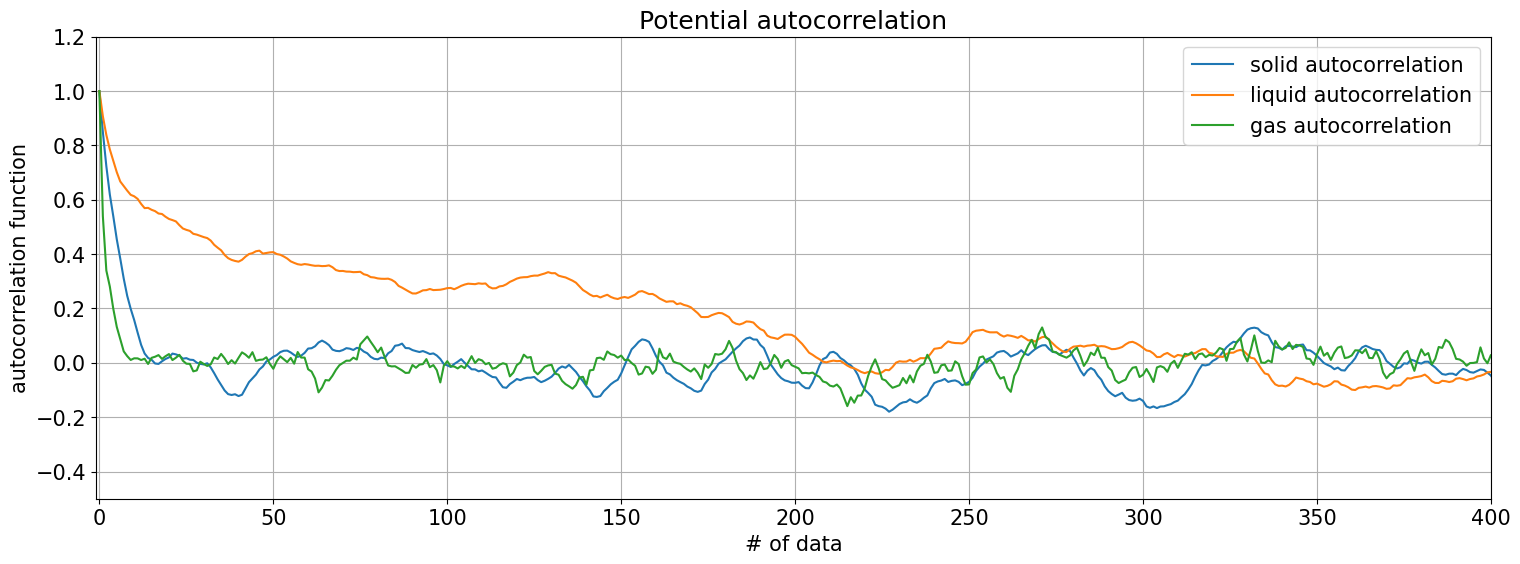

In [337]:
fig = plt.figure(figsize = (18,6) )

plt.plot(t,Xs, label = "solid autocorrelation")
plt.plot(t,Xl, label = "liquid autocorrelation")
plt.plot(t,Xg, label = "gas autocorrelation")
plt.title("Potential autocorrelation")
plt.ylabel("autocorrelation function")
plt.xlabel("# of data")
plt.xlim(-1,400)
plt.ylim(-0.5,1.2)
plt.grid()

plt.legend()

plt.show()

- After 200 steps the autocorrelation function is zero for each state
- Note that the liquid autocorrelation goes down slowly than the others

### BLOCK'S DIMENSION

In [3]:
V_solid = np.loadtxt("../c++/es 7/OUTPUT/error_study/solido/potential_energy.dat", usecols=(1), unpack = 'true')
V_liqid = np.loadtxt("../c++/es 7/OUTPUT/error_study/liquido/potential_energy.dat", usecols=(1), unpack = 'true')
V_gas   = np.loadtxt("../c++/es 7/OUTPUT/error_study/gas/potential_energy.dat", usecols=(1), unpack = 'true')

In [4]:
def error(x, L):
    M=len(x) # n dati 
    N = int(M/L) # n_blocks
    mean = []
    for i in range(N):
        start_index = int(i * L)
        end_index = int((i + 1) * L)
        block = x[start_index:end_index]
        block_mean = np.mean(block)
        mean.append(block_mean)
    error = np.sqrt(np.var(mean)/N) 
    return error

N = np.linspace(10, 5000, 500)
err_solid = [error(V_solid,L) for L in N]
err_liquid = [error(V_liqid,L) for L in N]
err_gas = [error(V_gas,L) for L in N]

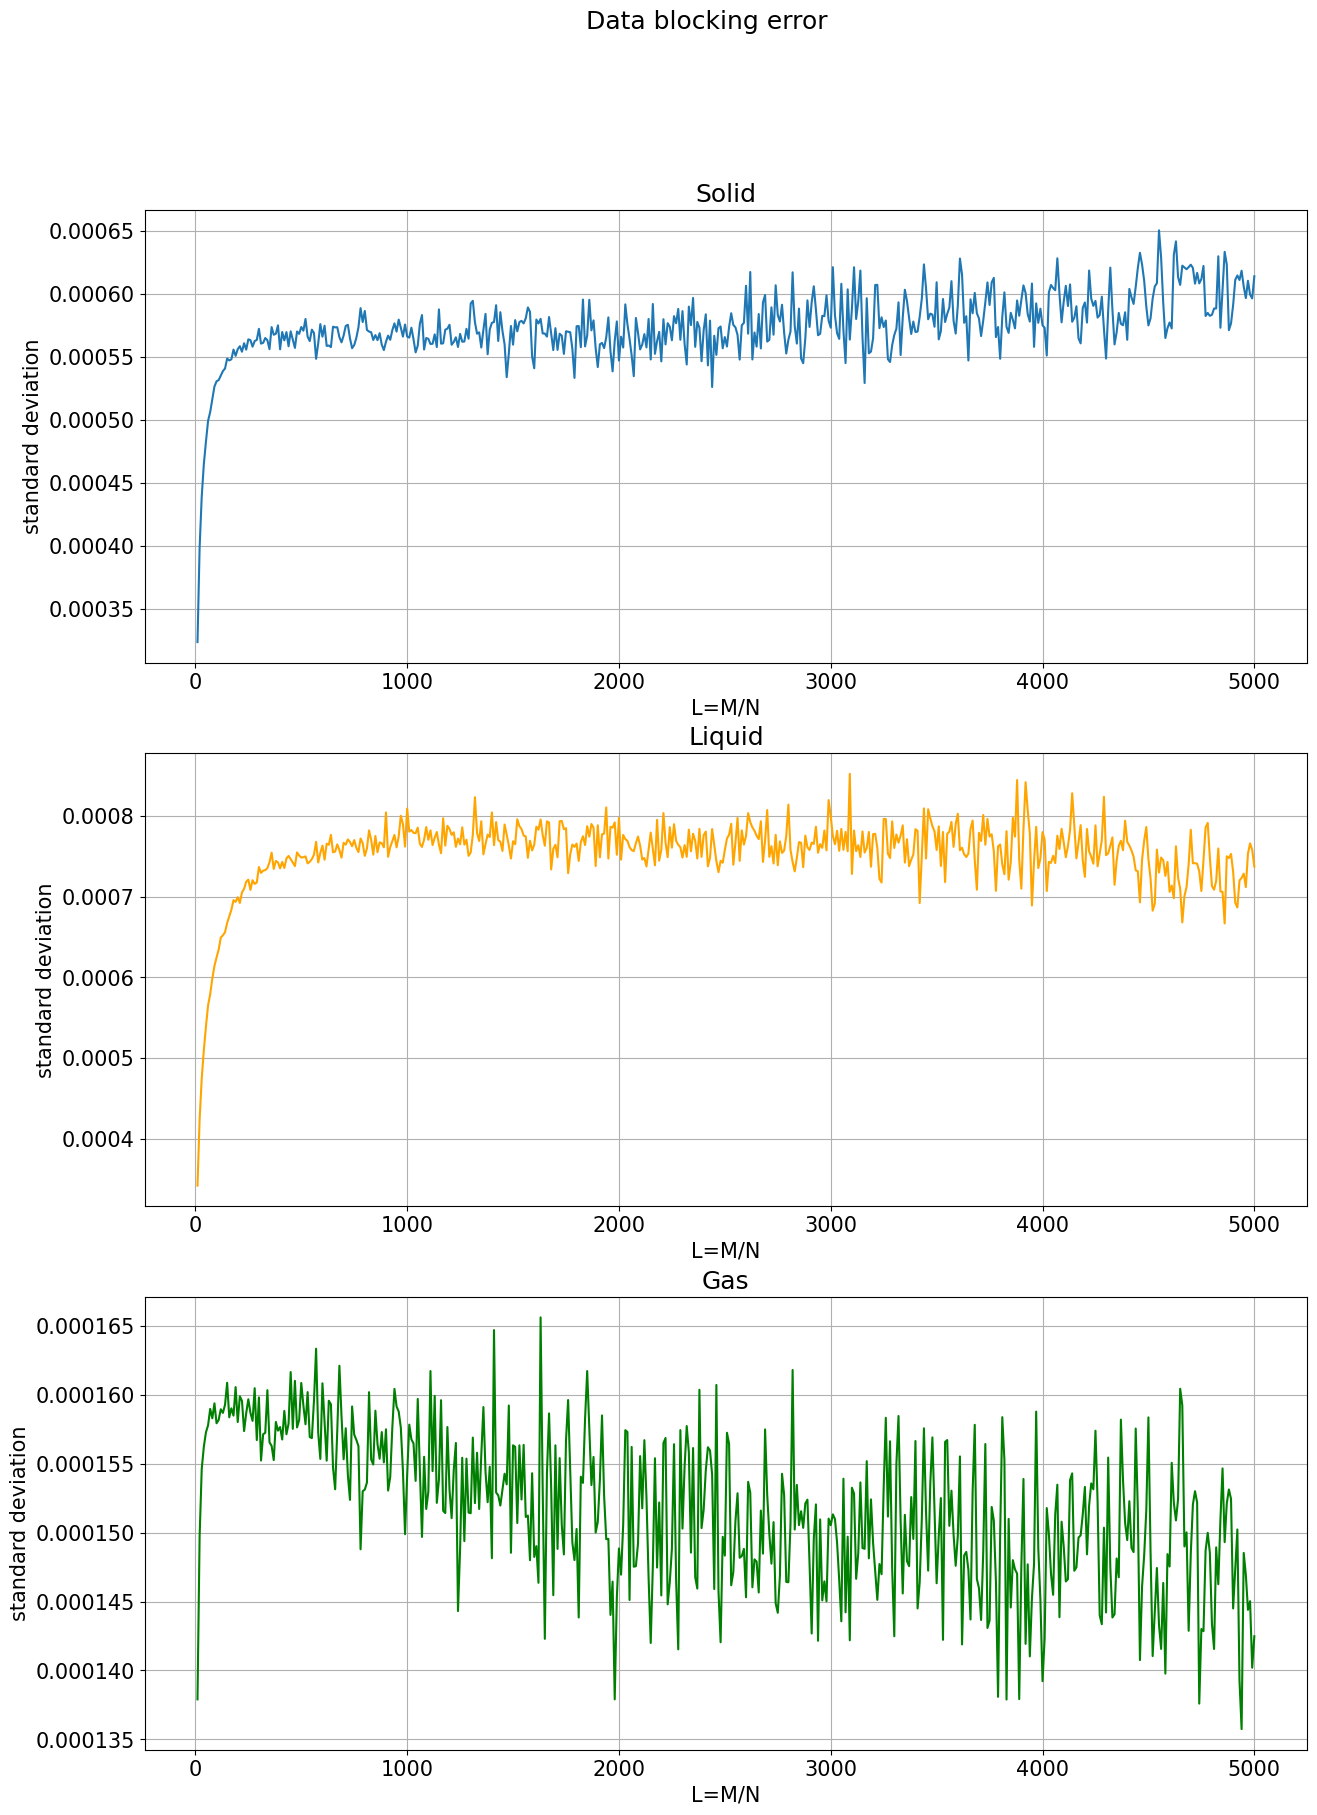

In [5]:
x=N
fig = plt.figure( figsize = (15,20) )
plt.suptitle("Data blocking error")
plt.subplot(3,1,1)
plt.title("Solid")
plt.xlabel("L=M/N")
plt.ylabel("standard deviation")
plt.grid()
plt.plot(x,err_solid, label = "solid" )

plt.subplot(3,1,2)
plt.title("Liquid")
plt.xlabel("L=M/N")
plt.ylabel("standard deviation")
plt.plot(x,err_liquid, color = 'orange' ,label = "liquid" )
plt.grid()

plt.subplot(3,1,3)
plt.title("Gas")
plt.xlabel("L=M/N")
plt.ylabel("standard deviation")
plt.plot(x,err_gas, color = 'green' ,label = "liquid" )
plt.grid()

- In this plots we can see how using block with at least 500 steps it's ok, this way we don't understimate the error

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the NSL simulator code</span>: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

### GOFR, PRESSURE & POTENTIAL

- I will show the comparison between NVE and NVT for the GOFR calculation
- In the NVE simulation the equilibrium condition is reached less quickly tha in the NVT, so it's necessary to add an equilibration phase before starting the simulation like in exercise 4
- I will show pressure and potential value for the NVT simulation in function of the number of blocks

In [294]:
def plot_ave(state):
    N = 50 #blocchi da 10k steps
    x = np.linspace(0,N,N)
    #fig, axs = plt.subplots(1,2, figsize = (10,10) )
    fig = plt.figure(figsize =(8,8) )
    #fig.suptitle("Simulation", fontsize = (22))

    prex, error_prex  = np.loadtxt("../c++/es 7/OUTPUT/"+state+"/NVT/pressure.dat",usecols=(2,3), unpack = 'true')
    #prex, error_prex  = np.loadtxt("../c++/es 7/OUTPUT/pressure.dat",usecols=(2,3), unpack = 'true')
    pot, error_pot,   = np.loadtxt("../c++/es 7/OUTPUT/"+state+"/NVT/potential_energy.dat",usecols=(2,3), unpack = 'true')
    #pot, error_pot,   = np.loadtxt("../c++/es 7/OUTPUT/potential_energy.dat",usecols=(2,3), unpack = 'true')
    plt.suptitle(state)
    plt.subplot(2,1,1)
    plt.errorbar(x,prex,yerr=error_prex, label = "simulation", color = "blue")
    #plt.plot(r_0_ist, label = "position")
    plt.title("Pressure")
    plt.xlabel("blocks")
    plt.ylabel("P*")
    plt.hlines(prex[-1] ,0 ,N, color = "red" , label = "last block value")
    #plt.hlines(1.5 ,0 ,N, color = "orange", label = "expected value") 
    plt.grid(True)

    plt.subplot(2,1,2)
    plt.errorbar(x,pot,yerr=error_pot, color = "blue")
    #plt.plot(r_1_ist, label = "position")
    plt.title("Potential energy")
    plt.xlabel("blocks")
    plt.ylabel("V*")
    #plt.hlines(5 ,0 ,N, color = "orange") 
    plt.hlines(pot[-1] ,0 ,N, color = "red") 
    plt.grid(True)

    plt.subplots_adjust(wspace=0.3, hspace=0.4)
    fig.legend( fontsize = 13)

    plt.show()

In [295]:
def plot_gofr(state):
    r,gofr         = np.loadtxt("../c++/es 7/OUTPUT/"+state+"/NVT/gofr.dat", usecols=(0,1), unpack = 'true')
    r_NVE,gofr_NVE = np.loadtxt("../c++/es 7/OUTPUT/"+state+"/NVE/gofr.dat", usecols=(0,1), unpack = 'true')
    #r_NVE,gofr_NVE = np.loadtxt("../c++/es 7/OUTPUT/gofr.dat", usecols=(0,1), unpack = 'true')
    plt.figure(figsize=(10, 6)) 
    plt.plot(r,gofr, label="NVT")
    plt.plot(r_NVE,gofr_NVE, label = "NVE")
    plt.xlabel("r*")
    plt.ylabel("g(r*)")
    plt.title("GOFR "+state)
    plt.legend()
    plt.grid();

### SOLIDO

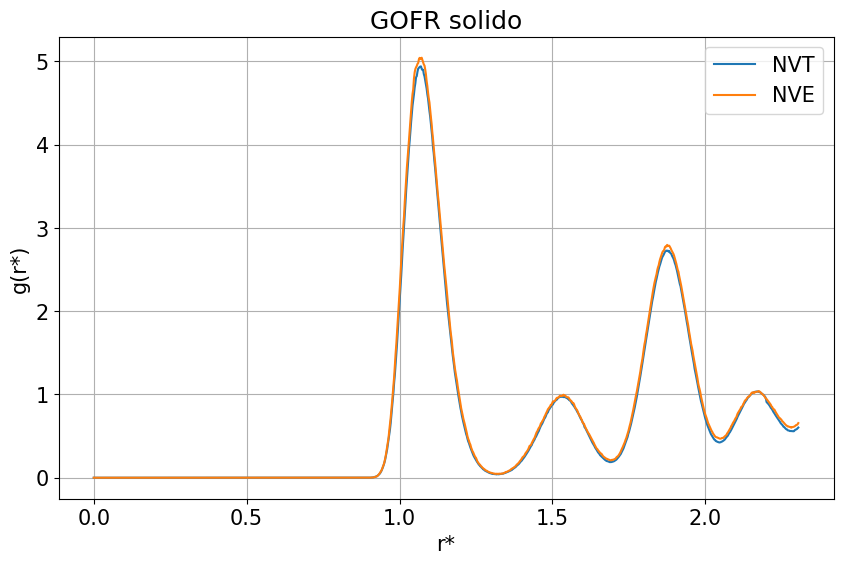

In [296]:
plot_gofr("solido")

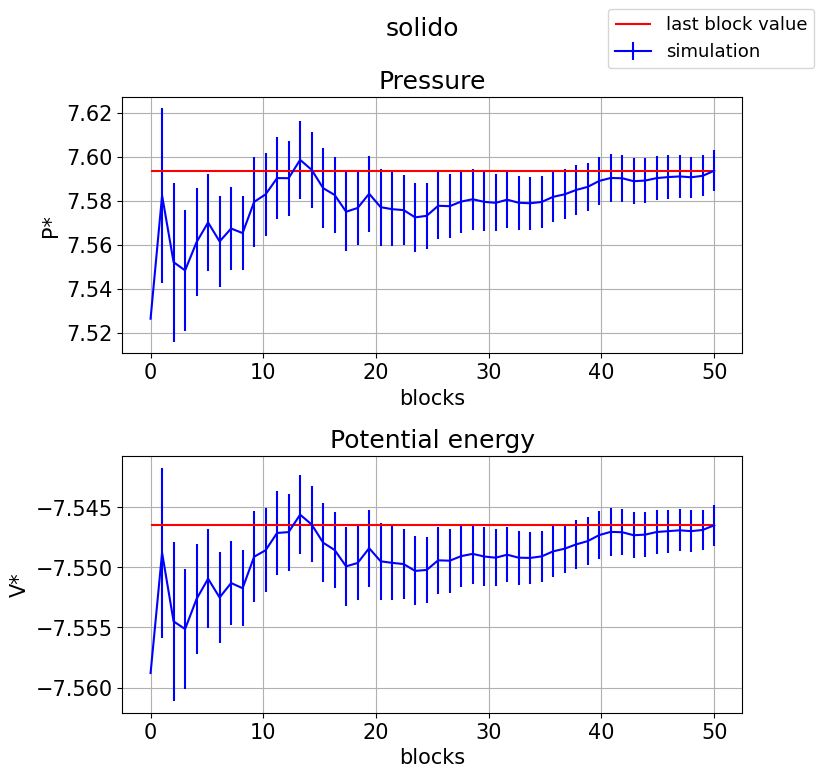

In [297]:
plot_ave("solido")

### LIQUIDO

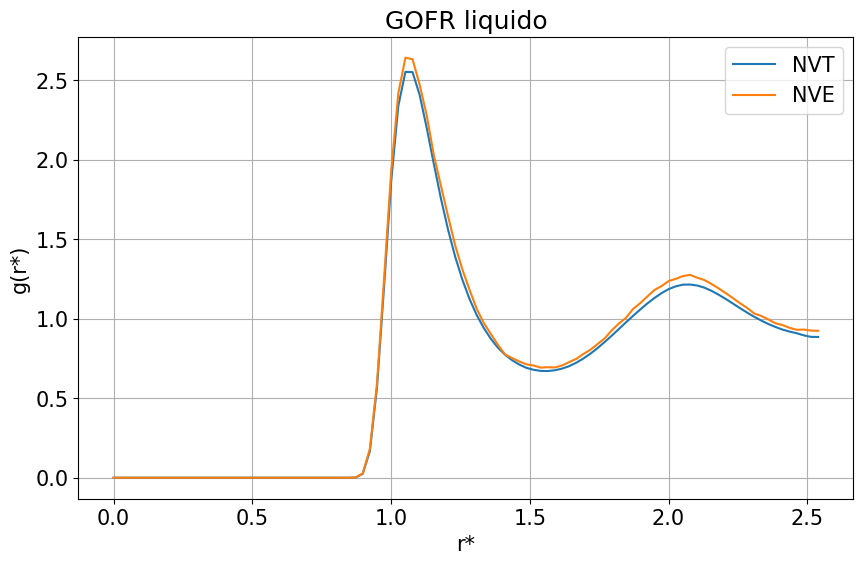

In [298]:
plot_gofr("liquido")

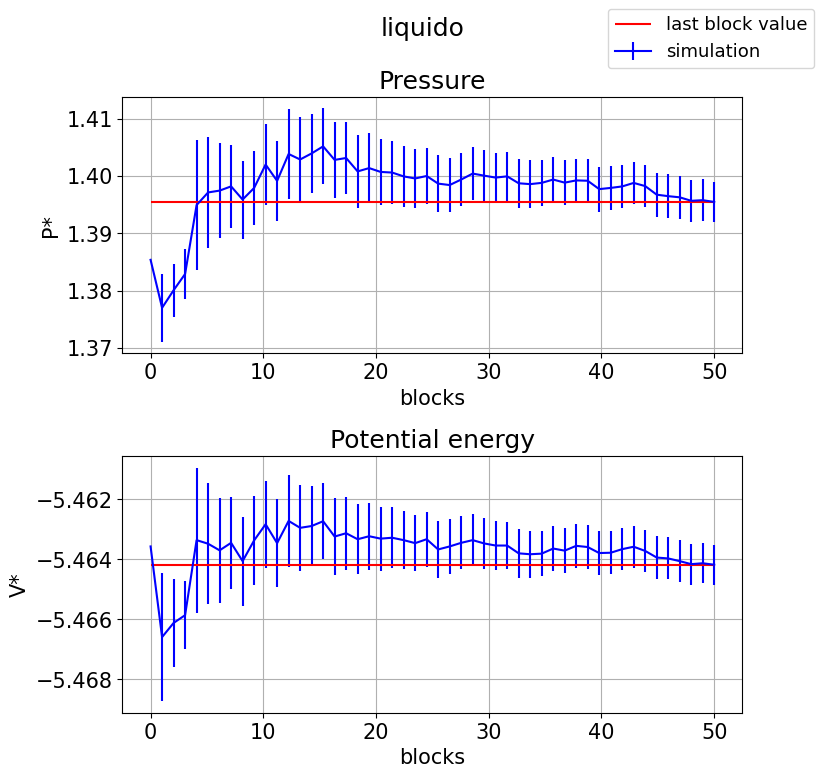

In [299]:
plot_ave("liquido")

### GAS

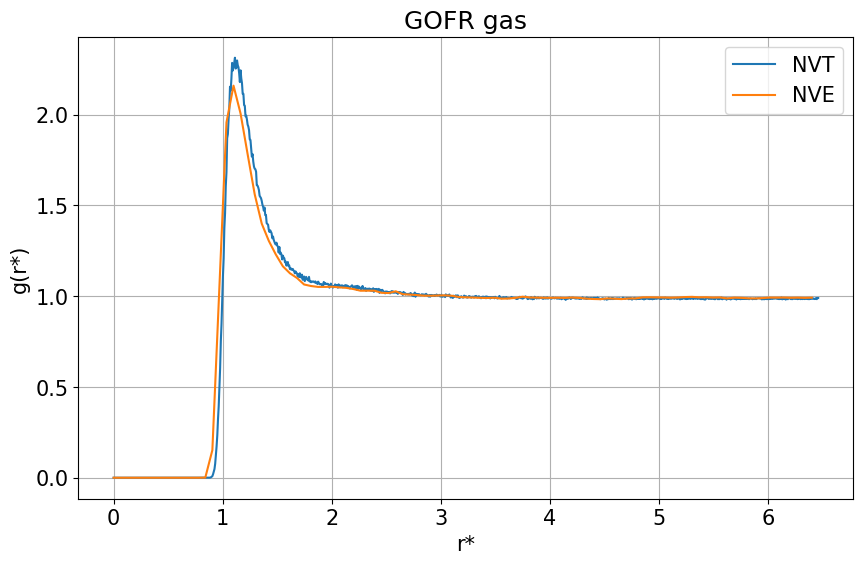

In [300]:
plot_gofr("gas")

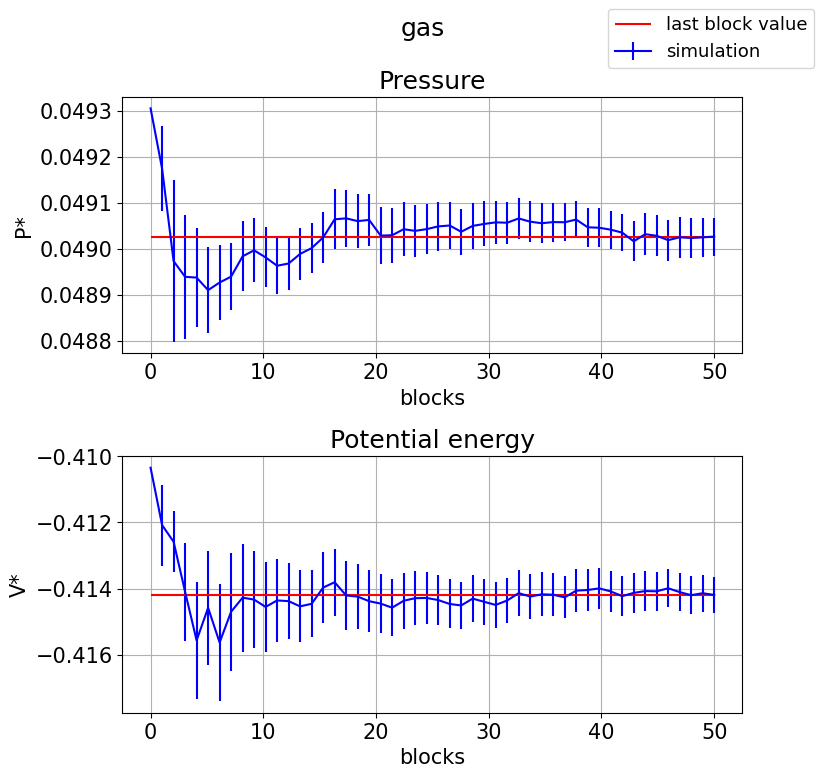

In [301]:
plot_ave("gas")